# FIFA 19 PLAYER

In [103]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats
import statsmodels.api as sm

%matplotlib inline

In [104]:
data = pd.read_csv('data.csv')

Jumlah Row dan Columns pada Data Set

In [105]:
data.shape

(18207, 89)

In [106]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Unnamed: 0                18207 non-null  int64   
 1   ID                        18207 non-null  int64   
 2   Name                      18207 non-null  object  
 3   Age                       18207 non-null  int64   
 4   Nationality               18207 non-null  object  
 5   Overall                   18207 non-null  int64   
 6   Potential                 18207 non-null  int64   
 7   Club                      17966 non-null  object  
 8   Wage                      18207 non-null  object  
 9   Preferred Foot            18159 non-null  object  
 10  International Reputation  18159 non-null  float64 
 11  Weak Foot                 18159 non-null  float64 
 12  Skill Moves               18159 non-null  float64 
 13  Work Rate                 18159 non-null  obje

In [108]:
data.drop(["Photo","Flag","Club Logo", "Value", "Special","LS", 
    "ST", "RS", "LW","LF","CF", "RF", "RW",
    "LAM", "CAM", "RAM", "LM", "LCM", "CM", 
    "RCM", "RM", "LWB", "LDM", "CDM", "RDM",
    "RWB","LB", "LCB", "CB", "RCB", "RB"
 ], inplace=True, axis=1)

In [109]:
data.shape

(18207, 58)

In [110]:
pd.set_option("display.precision", 2)
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.00,18207.00,18207.00,18207.00,18207.00,18159.00,18159.00,18159.00,18147.00,18159.00,...,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00
mean,9103.00,214298.34,25.12,66.24,71.31,1.11,2.95,2.36,19.55,49.73,...,48.55,58.65,47.28,47.70,45.66,16.62,16.39,16.23,16.39,16.71
std,5256.05,29965.24,4.67,6.91,6.14,0.39,0.66,0.76,15.95,18.36,...,15.70,11.44,19.90,21.66,21.29,17.70,16.91,16.50,17.03,17.96
min,0.00,16.00,16.00,46.00,48.00,1.00,1.00,1.00,1.00,5.00,...,5.00,3.00,3.00,2.00,3.00,1.00,1.00,1.00,1.00,1.00
25%,4551.50,200315.50,21.00,62.00,67.00,1.00,3.00,2.00,8.00,38.00,...,39.00,51.00,30.00,27.00,24.00,8.00,8.00,8.00,8.00,8.00
50%,9103.00,221759.00,25.00,66.00,71.00,1.00,3.00,2.00,17.00,54.00,...,49.00,60.00,53.00,55.00,52.00,11.00,11.00,11.00,11.00,11.00
75%,13654.50,236529.50,28.00,71.00,75.00,1.00,3.00,3.00,26.00,64.00,...,60.00,67.00,64.00,66.00,64.00,14.00,14.00,14.00,14.00,14.00
max,18206.00,246620.00,45.00,94.00,95.00,5.00,5.00,5.00,99.00,93.00,...,92.00,96.00,94.00,93.00,91.00,90.00,92.00,91.00,90.00,94.00


In [111]:
df[
    df['Nationality'] == 'England'
]

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
16,16,202126,H. Kane,24,England,89,91,Tottenham Hotspur,€205K,Right,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M
60,60,202652,R. Sterling,23,England,86,89,Manchester City,€195K,Right,...,77.0,47.0,58.0,54.0,15.0,12.0,12.0,15.0,9.0,€108.8M
117,117,211117,D. Alli,22,England,84,90,Tottenham Hotspur,€115K,Right,...,86.0,70.0,70.0,63.0,7.0,6.0,9.0,11.0,8.0,€87.1M
135,135,188377,K. Walker,28,England,84,84,Manchester City,€165K,Right,...,75.0,78.0,84.0,83.0,12.0,6.0,16.0,15.0,8.0,€45.3M
180,180,204935,J. Pickford,24,England,83,88,Everton,€78K,Left,...,69.0,16.0,20.0,12.0,83.0,78.0,88.0,81.0,86.0,€49.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18198,18198,242844,J. Livesey,18,England,47,70,Burton Albion,€1K,Right,...,34.0,15.0,11.0,13.0,46.0,52.0,58.0,42.0,48.0,€165K
18202,18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€1K,Right,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18204,18204,241638,B. Worman,16,England,47,67,Cambridge United,€1K,Right,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€1K,Right,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [112]:
df.loc[df["Nationality"] == "England", "Club"].value_counts()

Shrewsbury         24
Tranmere Rovers    24
Portsmouth         24
Port Vale          23
AFC Wimbledon      23
                   ..
Colorado Rapids     1
SC Freiburg         1
Stade de Reims      1
GIF Sundsvall       1
Wolfsberger AC      1
Name: Club, Length: 152, dtype: int64

In [113]:
df["Position"] = pd.Categorical(df["Position"])

In [114]:
df["Position"].dtype

CategoricalDtype(categories=['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB',
                  'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB',
                  'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
                 ordered=False)

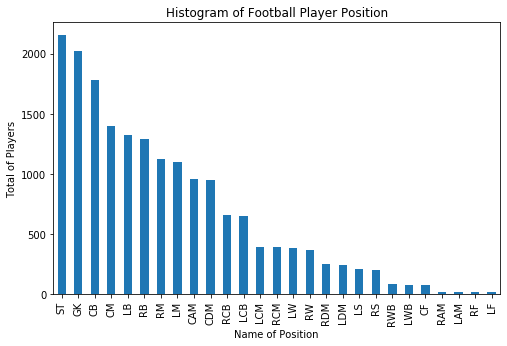

In [115]:
df["Position"].value_counts().head(50).plot(kind="bar", figsize=(8, 5))

plt.title('Histogram of Football Player Position')
plt.ylabel('Total of Players')
plt.xlabel('Name of Position')

plt.show()

In [116]:
data_reputation = data.groupby('International Reputation', axis=0).sum()
print(type(data.groupby('International Reputation', axis=0)))

data_reputation.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Unnamed: 0,ID,Age,Overall,Potential,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
International Reputation,,,,,,,,,,,,,,,,,,,,,
1.0,162147905,3600359337,408714,1077672,1168003,48297.0,38223.0,329011.0,803385.0,735360.0,...,784977.0,946272.0,768611.0,776632.0,744795.0,274608.0,270991.0,268648.0,270553.0,276271.0
2.0,2772208,226737122,36774,95286,96663,3998.0,3537.0,20575.0,76307.0,69274.0,...,73280.0,89983.0,69581.0,69663.0,65709.0,20771.0,20406.0,19969.0,20803.0,20848.0
3.0,175511,55327154,8967,25132,25460,1032.0,936.0,4602.0,19561.0,18745.0,...,19373.0,24010.0,17343.0,16930.0,15910.0,5252.0,5159.0,5119.0,5188.0,5216.0
4.0,6100,7924461,1556,4397,4412,168.0,160.0,469.0,3458.0,3312.0,...,3502.0,4199.0,2857.0,2745.0,2597.0,951.0,942.0,845.0,890.0,952.0
5.0,141,755006,189,545,546,25.0,23.0,46.0,412.0,468.0,...,462.0,530.0,195.0,175.0,155.0,152.0,157.0,177.0,172.0,166.0


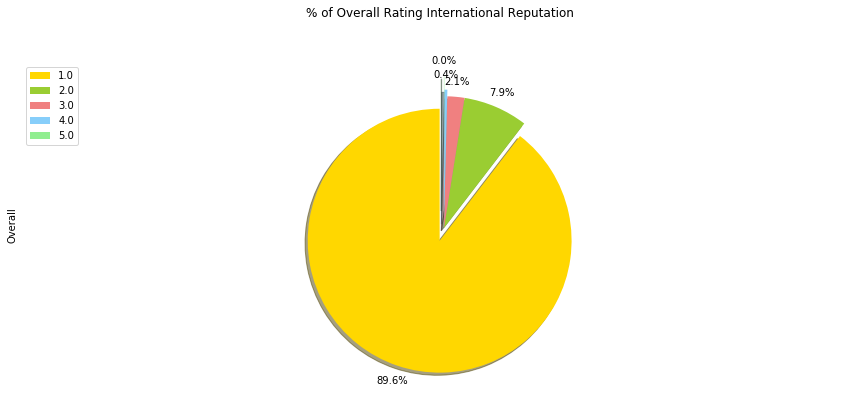

In [117]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.1, 0, 0, 0.05, 0.15] 
data_reputation['Overall'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,    
                            colors=colors_list,  
                            explode=explode_list 
                            )

plt.title('% of Overall Rating International Reputation', y=1.12) 

plt.axis('equal') 

plt.legend(labels=data_reputation.index, loc='upper left') 

plt.show()

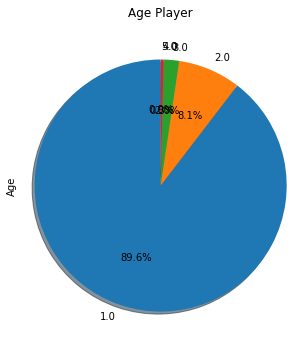

In [152]:
# autopct create %, start angle represent starting point
data_reputation['Age'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Age Player')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [155]:
data.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
International Reputation,,,,,,,,,,,,,,,,,,,,,
5.0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
5.0,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
5.0,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
4.0,3,193080,De Gea,27,Spain,91,93,Manchester United,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4.0,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [156]:
data.isnull().any()

Unnamed: 0              False
ID                      False
Name                    False
Age                     False
Nationality             False
Overall                 False
Potential               False
Club                     True
Wage                    False
Preferred Foot           True
Weak Foot                True
Skill Moves              True
Work Rate                True
Body Type                True
Real Face                True
Position                 True
Jersey Number            True
Joined                   True
Loaned From              True
Contract Valid Until     True
Height                   True
Weight                   True
Crossing                 True
Finishing                True
HeadingAccuracy          True
ShortPassing             True
Volleys                  True
Dribbling                True
Curve                    True
FKAccuracy               True
LongPassing              True
BallControl              True
Acceleration             True
SprintSpee

In [157]:
x=data.iloc[:,3] 

In [158]:
x.head()

International Reputation
5.0    31
5.0    33
5.0    26
4.0    27
4.0    27
Name: Age, dtype: int64

In [159]:
x.isnull().any()

False

In [194]:
y=data.iloc[:,6]

In [195]:
y.head()

International Reputation
5.0    94
5.0    94
5.0    93
4.0    93
4.0    92
Name: Potential, dtype: int64

In [196]:
y.isnull().any()

False

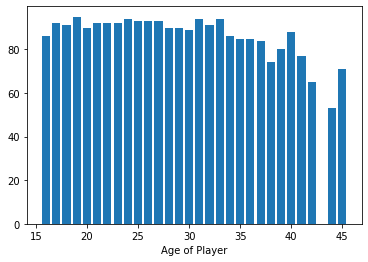

In [197]:
plt.bar(data["Age"],data["Potential"])
plt.xlabel("Age of Player")
plt.show()

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [200]:
from sklearn.linear_model import LinearRegression

In [201]:
regressor=LinearRegression()

In [202]:
type(x_train)
type(y_train)

pandas.core.series.Series

In [203]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [204]:
type(x_train)
type(y_train)

numpy.ndarray

In [205]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)

In [206]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
x_test=np.array(x_test)

In [208]:
x_test=x_test.reshape(-1,1)

In [209]:
y_pred= regressor.predict(x_test)

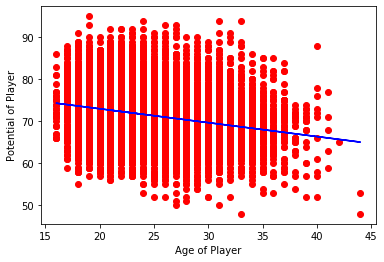

In [210]:
plt.scatter(x_train,y_train,color="red")
plt.xlabel("Age of Player")
plt.ylabel("Potential of Player")
plt.plot(x_train, regressor.predict(x_train),color="blue")
plt.show()

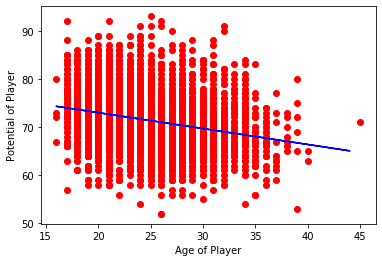

In [211]:
plt.scatter(x_test,y_test,color="red")
plt.xlabel("Age of Player")
plt.ylabel("Potential of Player")
plt.plot(x_train, regressor.predict(x_train),color="blue")
plt.show()

In [212]:
regressor.intercept_

array([79.61593458])

In [213]:
regressor.coef_

array([[-0.33049799]])

In [214]:
from sklearn.metrics import mean_squared_error

In [215]:
mean_squared_error(y_test,y_pred)

35.42740657794979

In [216]:
data[['Overall', 'Composure']]

,Overall,Composure
International Reputation,,
5.0,94,96.0
5.0,94,95.0
5.0,92,94.0
4.0,91,68.0
4.0,91,88.0
...,...,...
1.0,47,45.0
1.0,47,42.0
1.0,47,41.0


In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 18207 entries, 5.0 to 1.0
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            18207 non-null  int64  
 1   ID                    18207 non-null  int64  
 2   Name                  18207 non-null  object 
 3   Age                   18207 non-null  int64  
 4   Nationality           18207 non-null  object 
 5   Overall               18207 non-null  int64  
 6   Potential             18207 non-null  int64  
 7   Club                  17966 non-null  object 
 8   Wage                  18207 non-null  object 
 9   Preferred Foot        18159 non-null  object 
 10  Weak Foot             18159 non-null  float64
 11  Skill Moves           18159 non-null  float64
 12  Work Rate             18159 non-null  object 
 13  Body Type             18159 non-null  object 
 14  Real Face             18159 non-null  object 
 15  Position         

In [218]:
data.isnull().sum()

Unnamed: 0                  0
ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                      241
Wage                        0
Preferred Foot             48
Weak Foot                  48
Skill Moves                48
Work Rate                  48
Body Type                  48
Real Face                  48
Position                   60
Jersey Number              60
Joined                   1553
Loaned From             16943
Contract Valid Until      289
Height                     48
Weight                     48
Crossing                   48
Finishing                  48
HeadingAccuracy            48
ShortPassing               48
Volleys                    48
Dribbling                  48
Curve                      48
FKAccuracy                 48
LongPassing                48
BallControl                48
Acceleration               48
SprintSpee

In [219]:
data['Composure'] = data['Composure'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [145]:
x = data['Overall'].values.reshape(-1,1)
y = data['Composure'].values.reshape(-1,1)

In [146]:
r = np.corrcoef(x, y)
r

C:\Users\spo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)


MemoryError: Unable to allocate 9.88 GiB for an array with shape (36414, 36414) and data type float64